<h2 align=center> Principal Component Analysis</h2>

### Task 1: Load the Data and Libraries
---

In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [73]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris.columns=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width', 'species']
iris.dropna(how = "all", inplace = True)
iris.head()

,sepal_length,sepal_width,petal_lenth,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_lenth     150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 2: Visualize the Data
---

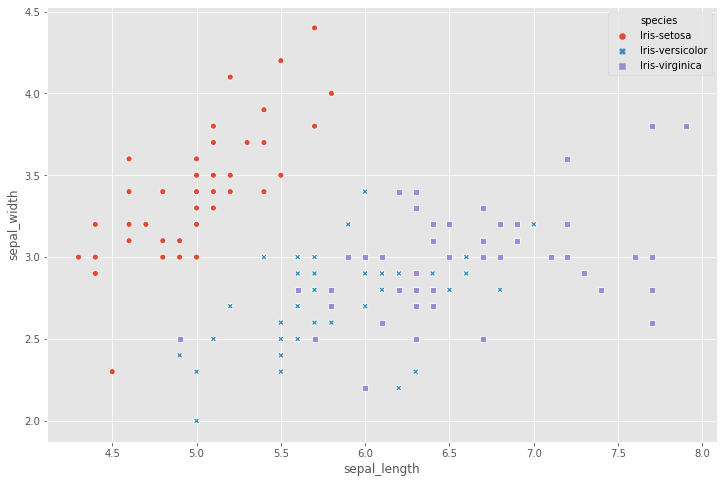

In [76]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
                hue = iris.species, style = iris.species);

### Task 3: Standardize the Data
---

In [77]:
from sklearn.preprocessing import StandardScaler
X = iris.iloc[:, 0:4].values
y = iris.species.values

X = StandardScaler().fit_transform(X)

### Task 4: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [78]:
covariance_matrix = np.cov(X.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [79]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]


### Task 5: Singular Value Decomposition (SVD)
---

In [80]:
eigen_vec_svd, s, v= np.linalg.svd(X.T)
eigen_vec_svd
#s
#v

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [81]:
#SVD can also be used on non-square matrices.

### Task 6: Picking Principal Components Using the Explained Variance
---

In [82]:
for val in eigen_values:
    print(val)

2.930353775589318
0.9274036215173415
0.1483422264816396
0.020746013995595936


In [83]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[72.77045209380135, 23.030523267680632, 3.6838319576273815, 0.5151926808906322]

In [84]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained
#As a general rule of thumb we want the principal components to explain 90 to 95 percent of variance.

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

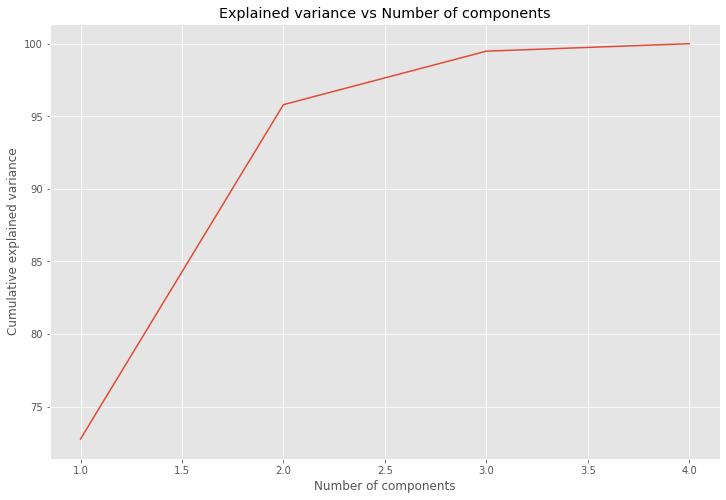

In [85]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

### Task 7: Project Data Onto Lower-Dimensional Linear Subspace
---

In [86]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [87]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T

print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [88]:
X_pca = X.dot(projection_matrix)

In [89]:
###Cell to verify values
#X
#y
#X_pca
#X_pca[y=='Iris-setosa',1]

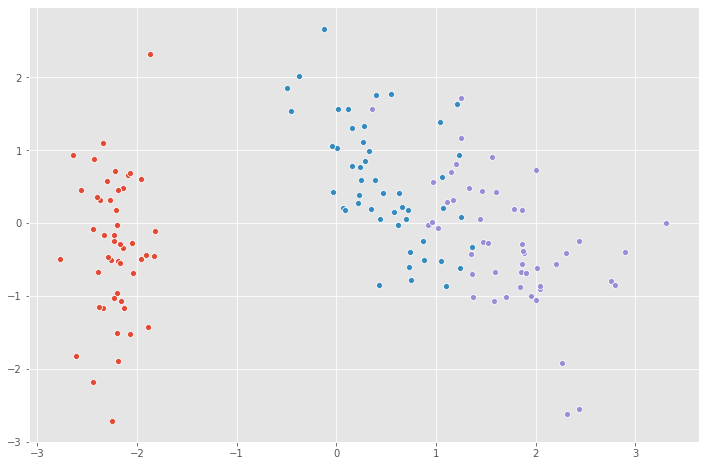

In [90]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species, 1])      #X_pca[y==species,i] refers to elements in X_pca from row numbers for which y[row_number]=='species' is true. Column number is i.